# Imports
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# %matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: x.lstrip('€').rstrip('MK'))
fifa['ValueNumeric']


0        110.5
1           77
2        118.5
3           72
4          102
         ...  
18202       60
18203       60
18204       60
18205       60
18206       60
Name: ValueNumeric, Length: 18207, dtype: object

In [6]:
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype(float)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
# Your code here:
fifa['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [8]:
print(fifa.Position.dtype)
print(fifa.Position.isnull().sum())
print(fifa.ValueNumeric.dtype)
print(fifa.ValueNumeric.isnull().sum())
print(fifa['Preferred Foot'].dtype)
print(fifa['Preferred Foot'].isnull().sum())

object
60
float64
0
object
48


In [9]:
len(fifa)

18207

In [10]:
df_position = fifa[fifa['Position'].notnull()]
len(df_position)

18147

In [11]:
print(df_position['Preferred Foot'].isnull().sum())

0


In [12]:
df_anova =  df_position[['ValueNumeric','Position','Preferred Foot']]
df_anova.head()

,ValueNumeric,Position,Preferred Foot
0,110.5,RF,Left
1,77.0,ST,Right
2,118.5,LW,Right
3,72.0,GK,Right
4,102.0,RCM,Right


In [13]:
grps = pd.unique(df_anova['Preferred Foot'])
grps

array(['Left', 'Right'], dtype=object)

In [14]:
d_data = {grp:df_anova['ValueNumeric'][df_anova['Preferred Foot'] == grp] for grp in grps}
first_value = list(d_data.values())[0]
first_value

0        110.5
13        60.0
15        89.0
17        78.0
19        53.5
         ...  
18172     50.0
18175     40.0
18191     50.0
18200     60.0
18201     60.0
Name: ValueNumeric, Length: 4209, dtype: float64

In [15]:
F, p = stats.f_oneway(d_data['Left'], d_data['Right'])
print(f'F = {F}, p={p}')

F = 3.717056557489896, p=0.0538748239296697


In [16]:
grps = pd.unique(df_anova['Position'])
grps

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [17]:
d_data = {grp:df_anova['ValueNumeric'][df_anova['Position'] == grp] for grp in grps}
first_value = list(d_data.values())[0]
first_value

0        110.5
50        45.0
528       11.5
890        6.5
1774       6.5
3255       4.2
3596       3.3
3759       3.9
5465       3.1
6108       1.0
6161       1.5
6430       1.1
6662       1.2
9388     220.0
9506     850.0
10110    625.0
Name: ValueNumeric, dtype: float64

In [18]:
F, p = stats.f_oneway(d_data['RF'], d_data['ST'], d_data['LW'], d_data['GK'], d_data['RCM'], d_data['LF'],
                      d_data['RS'], d_data['RCB'], d_data['LCM'], d_data['CB'], d_data['LDM'], d_data['CAM'],
                      d_data['CDM'], d_data['LS'], d_data['LCB'], d_data['RM'], d_data['LAM'], d_data['LM'],
                      d_data['LB'], d_data['RDM'], d_data['RW'], d_data['CM'], d_data['RB'], d_data['RAM'],
                      d_data['CF'], d_data['RWB'], d_data['LWB'])
print(f'F = {F}, p={p}')

F = 4.141509197155249, p=7.234254135439405e-12


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
# para el caso de si hay relación entre si son zurdos o diestros con su valor 
# Como el valor de pvalue es mayor al margen de tolerancia aceptamos la hipotesis nula
# Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa 
# entre si son zurdos o diestros con su valor 

# para el caso de si hay relación entre la Posisción y el valor del jugador
# Como el valor de pvalue es menor al margen de tolerancia aceptamos la hipotesis nula
# Por lo tanto llegamos a la conclusión de que SI existe una diferencia significativa 
# entre la Posisción y el valor del jugador

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [19]:
print(fifa['Nationality'].isnull().sum())
print(fifa['ValueNumeric'].isnull().sum())

0
0


In [20]:
df_anova =  df_position[['ValueNumeric','Nationality']]
df_anova.head()

,ValueNumeric,Nationality
0,110.5,Argentina
1,77.0,Portugal
2,118.5,Brazil
3,72.0,Spain
4,102.0,Belgium


In [21]:
# Your code here:
grps = pd.unique(df_anova['Nationality'])
grps


array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [22]:
d_data = {grp:df_anova['ValueNumeric'][df_anova['Nationality'] == grp] for grp in grps}
first_value = list(d_data.values())[0]
first_value

0        110.5
15        89.0
23        64.5
38        57.0
43        64.5
         ...  
17349    120.0
17355    140.0
17638     50.0
17861    110.0
17987     40.0
Name: ValueNumeric, Length: 936, dtype: float64

In [54]:
F, p = stats.f_oneway(d_data['Argentina'], d_data['Portugal'], d_data['Brazil'], d_data['Spain'], d_data['Belgium'], d_data['Croatia'], d_data       ['Uruguay'], d_data['Slovenia'], d_data['Poland'], d_data['Germany'], d_data['France'], d_data['England'], d_data       ['Italy'], d_data['Egypt'], d_data['Colombia'], d_data['Denmark'], d_data['Gabon'], d_data['Wales'])    
print(f'F = {F}, p={p}')

F = 9.408615306582515, p=4.665176133449194e-25


What is your conclusion from this ANOVA?

In [ ]:
# Como el valor de pvalue es menor al margen de tolerancia rechazamos la hipotesis nula
# Por lo tanto llegamos a la conclusión de que SI existe una diferencia significativa 
# entre la Nacionalidad y el valor del jugador.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [25]:
fifa.shape

(18207, 21)

In [23]:
# Your code here:
fifa.isna().sum()



Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [30]:
# % of rowsna
rowsna = len(fifa.loc[fifa.Club.isnull()])
rows = len(fifa) 
percent = rowsna / rows
percent

0.01323666721590597

In [32]:
# since de rows na represent less than 1% we can delete them without afect test
fifa.dropna(inplace=True)
fifa.isna().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

In [33]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

# Y = AX + B

In [100]:
# get list of numerical cols
numerical_cols = list(fifa.columns[fifa.dtypes != object])
numerical_cols

['Age',
 'Overall',
 'Potential',
 'Weak Foot',
 'Acceleration',
 'SprintSpeed',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'ValueNumeric']

In [107]:
df = fifa[['Age', 'Overall', 'Potential', 'Weak Foot', 'Acceleration', 'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']]

In [108]:
# Your code here:
y = df.Stamina
x = df.drop('Stamina',axis=1)
# print(y.head())
# print(x.head())

In [109]:
# creamos variables para la regresión utilizando la función train test split
# 20% para test y 80% para entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 77)

In [110]:
# regresíón lineal
from sklearn import linear_model
regresion = linear_model.LinearRegression()

In [116]:
# ejecución del modelo
regresion.fit(x_train, y_train)

LinearRegression()

In [117]:
# presición del entrenamiento
train_score = regresion.score(x_train, y_train)
test_score = regresion.score(x_test, y_test)
print(train_score)
print(test_score)

0.7227992130306042
0.7225676843630875


In [112]:
coeff_df = pd.DataFrame(regresion.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Age,-0.525338
Overall,0.395968
Potential,-0.494335
Weak Foot,0.168609
Acceleration,0.187368
SprintSpeed,0.171526
Strength,0.160496
LongShots,0.062657
Aggression,0.130040
Interceptions,0.245556


In [114]:
regresion.intercept_

19.270154963389253

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [120]:
# valore estimados
predicted = regresion.predict(x_test)
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df_pred

,Actual,Predicted
18019,23.0,22.472794
6846,78.0,77.546071
994,73.0,73.732537
3028,32.0,39.624930
3086,75.0,77.943885
...,...,...
4776,55.0,72.327934
2709,76.0,73.488836
1777,35.0,36.019852
8788,76.0,71.371188


In [135]:
# Your conclusions here:
from sklearn import metrics
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

metrics.mean_squared_error(y_test, predicted)
metrics.mean_absolute_error(y_test,predicted)
rr = Ridge()
rr.fit(x_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(x_train,y_train)


Ridge(alpha=100)

In [130]:
ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
ridge100_train_score = rr100.score(x_train, y_train)
ridge100_test_score = rr100.score(x_test, y_test)

In [131]:
predicted_ridge = rr100.predict(x_test)
predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted':predicted_ridge})
predicted_ridge

,Actual,Predicted
18019,23.0,22.479310
6846,78.0,77.548200
994,73.0,73.734869
3028,32.0,39.625596
3086,75.0,77.943630
...,...,...
4776,55.0,72.323583
2709,76.0,73.492467
1777,35.0,36.017063
8788,76.0,71.365883


In [132]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", ridge_train_score)
print("ridge regression test score low alpha:", ridge_test_score)
print("ridge regression train score high alpha:", ridge100_train_score)
print("ridge regression test score high alpha:", ridge100_test_score)

linear regression train score: 0.7227992130306042
linear regression test score: 0.7225676843630875
ridge regression train score low alpha: 0.7227992130232179
ridge regression test score low alpha: 0.7225677617189381
ridge regression train score high alpha: 0.7227991400835768
ridge regression test score high alpha: 0.7225753073803358


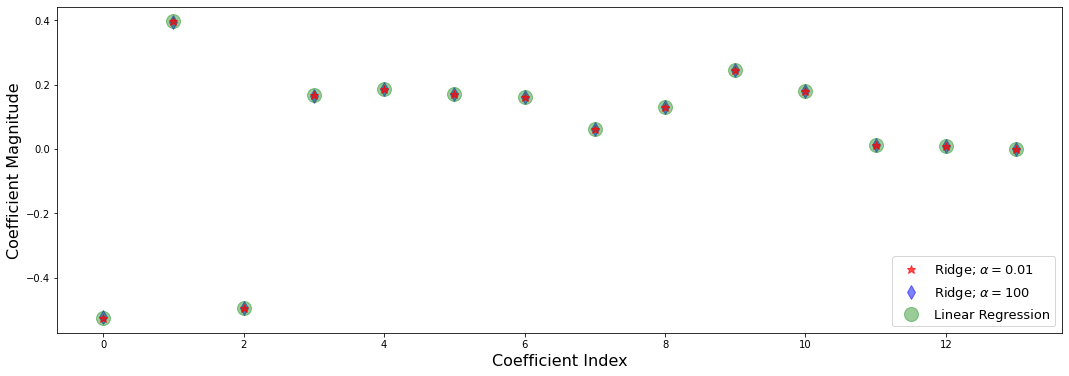

In [137]:
fig = plt.figure(facecolor='w',figsize=(18, 6))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(regresion.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()